In [1]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\wesle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importando Bibliotecas

In [2]:
import numpy as np, random # bibliotecas para manipulação de dados e geração de números aleatórios
import pingouin as pg # biblioteca pingouin para análise estatística
import pandas as pd # biblioteca pandas para manipulação de dados
from scipy.stats import shapiro # teste de normalidade de Shapiro-Wilk
from scipy.stats import kstest # teste de Kolmogorov-Smirnov
import scipy.stats as stats # biblioteca scipy para funções estatísticas
from scipy.stats import ttest_ind # teste t de Student para amostras independentes
from scipy.stats import bartlett # teste de Bartlett para homogeneidade de variâncias
import matplotlib.pyplot as plt # biblioteca matplotlib para visualização de dados
import seaborn as sns # biblioteca seaborn para visualização de dados
from scipy.stats import norm # distribuição normal
from scipy.stats import t as t_dist # distribuição t de Student

### Dados para os Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente NÃO são normais

In [3]:
#dados = np.random.normal(0, 1, 500)

In [4]:
#"""
dados = random.choice([
    np.random.normal(0, 1, 500),
    np.random.exponential(1, 500),
    np.random.uniform(-2, 2, 500),
    np.concatenate([np.random.normal(0, 1, 950), np.random.uniform(10, 20, 50)])
])
#"""
dados

array([ 1.34728506e+00, -1.79885403e-02, -8.83936112e-01,  2.21768510e+00,
       -2.07365073e+00, -2.49837658e+00,  2.76684193e-01, -1.53099396e+00,
        5.25193640e-02, -1.52320173e-01,  2.21909585e-02, -2.20008968e-02,
       -2.37229402e-01,  1.53174409e+00, -6.83547658e-01,  1.38063486e+00,
        1.11788390e+00,  1.28060530e+00, -1.11565153e-01,  6.24775586e-01,
        1.83487154e+00, -1.35266607e+00, -1.12126962e+00, -3.51884960e-01,
       -1.33883773e+00,  4.29973418e-01,  3.37653567e+00, -1.09281614e+00,
        7.72437314e-01,  1.11496621e+00,  6.08210073e-01,  1.15675200e+00,
       -1.59156679e+00, -2.76288575e-01,  8.33230762e-01, -6.94429064e-01,
        9.65394554e-01,  8.93019667e-01, -2.86634372e-01,  1.34272380e-01,
       -1.35716139e+00,  3.88475207e-01, -1.12718316e+00,  7.86395944e-01,
       -8.69960571e-02, -1.79355961e+00,  1.08688919e-01, -9.40492359e-01,
        7.20669822e-01, -2.89622502e-01,  2.44835824e+00, -6.82364379e-01,
       -8.31304730e-01,  

### Teste Kolmogorov-Smirnov

O **teste de Kolmogorov-Smirnov** é um teste estatístico usado para verificar se um conjunto de dados segue uma distribuição teórica específica. No contexto de testes de normalidade, ele avalia se os dados seguem uma distribuição normal.

O teste compara:

- A função de distribuição empírica dos dados

- Com a função de distribuição acumulada teórica da normal.

### Teste Kolmogorov-Smirnov Manual

In [5]:
def kolmogorov_smirnov(data):
    # Padroniza os dados para ter média 0 e desvio padrão 1 
    #data_padronizado = (data - np.mean(data)) / np.std(data, ddof=1)
    
    # Organize os dados em ordem crescente
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Função de distribuição empírica F_n(x)
    F_n = np.arange(1, n+1) / n
    
    # Função de distribuição acumulada da normal F(x)
    F_x = norm.cdf(data_sorted)
    
    # Calcula o D máximo
    D = np.max(np.abs(F_n - F_x))
    p_value = kstest(data, 'norm')[1]
    
    return (D,p_value)

In [6]:
print(f"Kolmogorov-Smirnov Manual: {kolmogorov_smirnov(dados)[0]:.4f} | p-value: {kolmogorov_smirnov(dados)[1]:.4f}")


Kolmogorov-Smirnov Manual: 0.0425 | p-value: 0.2683


### Teste Kolmogorov-Smirnov Biblioteca

In [7]:
estatistica, p_valor = kstest(dados, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.0445, 
p-valor = 0.2683


In [8]:
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


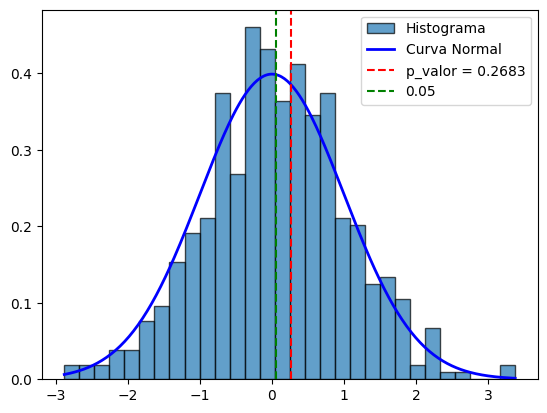

In [9]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Wilk

O **teste de Shapiro-Wilk** é um dos testes mais utilizados para verificar se uma amostra segue uma distribuição normal. Ele é especialmente eficaz para tamanhos de amostra pequenos e médios

O teste compara a variância da amostra com a variância esperada caso os dados fossem normais. A estatística do teste é o W, que mede o quão bem os dados se ajustam à distribuição normal teórica.

- W próximo de 1 → forte evidência de normalidade.

- W significativamente menor que 1 → desvio da normalidade.



### Teste Shapiro-Wilk Manual

In [10]:
def shapiro_wilk(dados):
    dados = np.sort(dados)
    n = len(dados)
    
    # Média e desvio padrão da amostra
    media = np.mean(dados)
    desvio = np.std(dados, ddof=1)
    
    # Estatísticas padronizadas
    z = (dados - media) / desvio

    # Coeficientes de Shapiro aproximados a_i,n
    # Para isso usamos quantis da normal padrão
    # - 0.375: quantil 0.375 da normal padrão
    # - 0.25: quantil 0.25 da normal padrão
    # O 0.375 e o 0.25 são valores empíricos usados para aproximar a distribuição dos coeficientes 
    # a_i,n, que são os coeficientes de Shapiro-Wilk.
    
    prob = []
    for i in range(1, n + 1):
        prob_value = (i - 0.375) / (n + 0.25)
        prob.append(prob_value)
    
    b = norm.ppf(prob) #ppf é a função de quantil da normal padrão
    b = b / np.linalg.norm(b)  # Normaliza m

    # Soma ponderada dos dados ordenados com os coeficientes m
    W_numerador = (np.sum(b * dados))**2
    W_denominador = np.sum((dados - media)**2)

    W = W_numerador / W_denominador
    p_valor = shapiro(dados)[1]
    return (W, p_valor)

In [11]:
print(f"Shapiro-Wilk Manual: {shapiro_wilk(dados)[0]:.4f} | p-value: {shapiro_wilk(dados)[1]:.4f}")

Shapiro-Wilk Manual: 0.9981 | p-value: 0.9143


### Teste Shapiro-Wilk Biblioteca


In [12]:
estatistica, p_valor = shapiro(dados)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.9983, 
p-valor = 0.9143


In [13]:
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


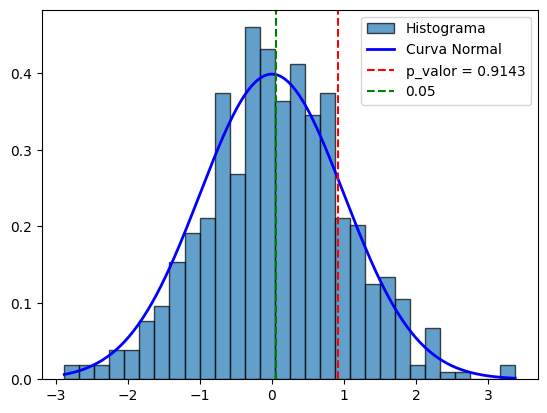

In [14]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Francia

O teste de Shapiro-Francia é uma variação do teste de Shapiro-Wilk, idealizado especialmente para detectar desvios da normalidade em amostras maiores. Ele é mais simples e rápido de computar, pois usa quantis normais no lugar de coeficientes tabelados.

Hipóteses:
​
- H0: Os dados seguem uma distribuição normal.
- H1: : Os dados não seguem uma distribuição normal

Se o W Se estiver muito distante de 1, a normalidade pode ser rejeitada

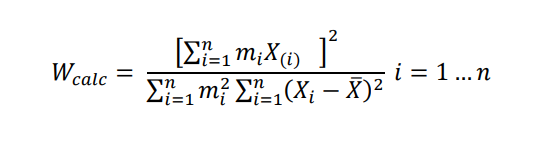

### Teste Shapiro-Francia Manual

In [15]:
def shapiro_francia_test(x):
    # Ordena os dados da amostra
    x = np.sort(x)
    n = len(x)

    # Calcula a média dos dados ordenados
    x_media = np.mean(x)

    # Gera os quantis esperados da normal padrão usando posições ajustadas (probabilidades simuladas)
    # Essa fórmula é uma heurística comum para gerar quantis simétricos
    # Estou usando isso para evitar o uso de coeficientes a_i,n, que são tabelados e não são facilmente acessíveis
    # O 0.375 e o 0.25 são valores empíricos usados para aproximar a distribuição dos coeficientes
    # ppf é a função de quantil da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m_media = np.mean(m)

    # Coeficientes a_i normalizados
    # Subtrai a média de m para centralizar os dados e depois normaliza
    u = m - m_media
    a = u / np.sqrt(np.sum(u ** 2))  # Normaliza os coeficientes

    # Cálculo do numerador do W': soma ponderada dos dados ordenados elevada ao quadrado
    numerador = (np.sum(a * x)) ** 2

    # Cálculo do denominador do W': soma dos quadrados das diferenças em relação à média
    denominador = np.sum((x - x_media) ** 2)

    # Estatística do teste de Shapiro-Francia
    W_calc = numerador / denominador

    # P-valor: aqui usamos a função shapiro do scipy apenas para obter o p-valor como aproximação
    p_value = shapiro(x)[1]

    return (W_calc, p_value)


In [16]:
stat, p = shapiro_francia_test(dados)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

Shapiro-Francia: W' = 0.9981, p-valor = 0.9143


In [17]:
if p <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


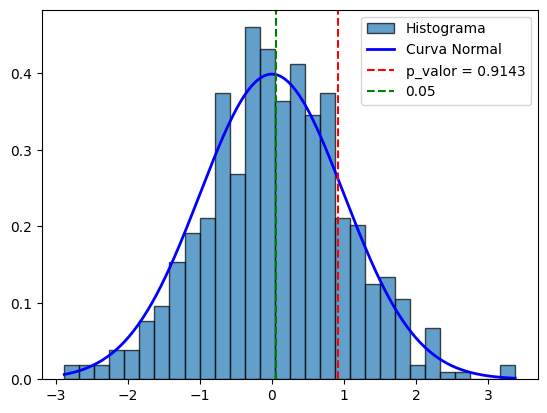

In [18]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Nível de Significância (α) - É o limite máximo que você aceita para cometer um erro tipo I (rejeitar a hipótese nula quando ela é verdadeira).


Comparar o p-valor que é a probabilidade de obter um resultado tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira.

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [19]:
grupo1 = np.random.normal(0, 1, 20)
grupo2 = np.random.normal(0, 1, 20)

In [20]:
"""grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

grupo2 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])"""

'grupo1 = random.choice([\n    np.random.normal(0, 1, 20),\n    np.random.exponential(1, 20),\n    np.random.uniform(-2, 2, 20),\n    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])\n])\n\ngrupo2 = random.choice([\n    np.random.normal(0, 1, 20),\n    np.random.exponential(1, 20),\n    np.random.uniform(-2, 2, 20),\n    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])\n])'

In [21]:
grupo1

array([ 0.12237516, -0.94275816,  0.21080514, -1.35663855,  2.1658472 ,
       -1.00768235,  0.92556607,  0.71315586,  0.45358723,  1.95352737,
       -0.16550686, -0.19059275,  1.38422339, -0.64927431,  0.12463698,
        0.87276749, -0.42981889,  0.42754702, -0.36376449,  0.08594285])

In [22]:
grupo2

array([ 0.10017231, -1.36555403, -1.28978367, -1.28229503, -1.71581368,
       -0.43335664,  0.2702897 , -0.14095135,  0.05014887, -1.2947857 ,
        1.19253482,  0.16688734,  0.21009837, -0.28016872,  1.88658954,
        0.61212541, -0.97967131, -1.18749024, -0.53594533,  0.79905693])

### Teste Z

### Teste Z manual

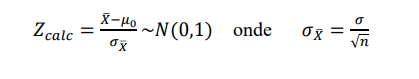

In [23]:
def teste_z_duas_amostras(grupo1, grupo2, sigma1, sigma2):
    n1, n2 = len(grupo1), len(grupo2)
    media1, media2 = np.mean(grupo1), np.mean(grupo2)

    # Fórmula do Z para duas amostras com desvio conhecido
    z = (media1 - media2) / np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

    # P-valor para teste bilateral
    p_valor = 2 * (1 - norm.cdf(abs(z)))

    return z, p_valor

In [24]:
z, p = teste_z_duas_amostras(grupo1, grupo2, sigma1=1, sigma2=1)

In [25]:
print(f"Z = {z:.4f}")
print(f"P-valor = {p:.4f}")

Z = 1.5103
P-valor = 0.1310


In [26]:
if p < 0.05:
    print("Rejeita H0: diferença estatisticamente significativa.")
else:
    print("Não rejeita H0: não há evidência forte de diferença.")

Não rejeita H0: não há evidência forte de diferença.


### Teste TStudent

O teste t de Student é um teste estatístico usado para determinar se há uma diferença significativa entre as médias de dois grupos (ou entre a média de um grupo e um valor conhecido)

### Tstudent uma amostra -  manual

Comparar a média de uma amostra com um valor conhecido, no caso mu = 0

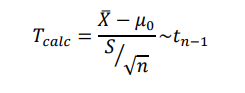

In [27]:
def teste_t_amostra(grupo, mu=0, alpha=0.05):
    """
    Realiza o teste t para uma amostra.

    Parâmetros:
    - grupo: array-like, dados da amostra
    - mu: valor da média populacional para o teste (default = 0) para testar se a média da amostra é diferente de 0
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t da amostra
    - mu: média populacional hipotética
    - alpha: nível de significância
    """

    # Calcular a média da amostra
    media_amostra = np.mean(grupo)

    # Calcular o desvio padrão amostral (ddof=1 -> desvio amostral)
    desvio_amostra = np.std(grupo, ddof=1)

    # Número de observações na amostra
    n = len(grupo)

    # Calcular o valor t
    t_calculado = (media_amostra - mu) / (desvio_amostra / np.sqrt(n))

    # Graus de liberdade
    df = n - 1

    # Valor crítico t (teste bilateral: alpha/2 em cada cauda)
    # ppf (Percent-Point Function) retorna o valor t crítico correspondente a uma probabilidade cumulativa
    t_critico = t_dist.ppf(1 - alpha / 2, df)

    

    return t_calculado, df

In [28]:
t_calculado, df = teste_t_amostra(grupo1)
print(f"Valor t calculado: {t_calculado:.4f}")
print(f"Graus de liberdade: {df}")

Valor t calculado: 1.0359
Graus de liberdade: 19


### Tstudent uma amostra - Biblioteca

In [29]:
mu = 0
t_stat, p_value = stats.ttest_1samp(grupo1, mu)
#stats - biblioteca de estatísticas do scipy
#ttest_1samp - teste t para uma amostra

In [30]:
print(f"Valor t calculado: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média da amostra é significativamente diferente de", mu)
else:
    print("Não rejeitar H0: A média da amostra não é significativamente diferente de", mu)

Valor t calculado: 1.0359
Valor p: 0.3133
Não rejeitar H0: A média da amostra não é significativamente diferente de 0


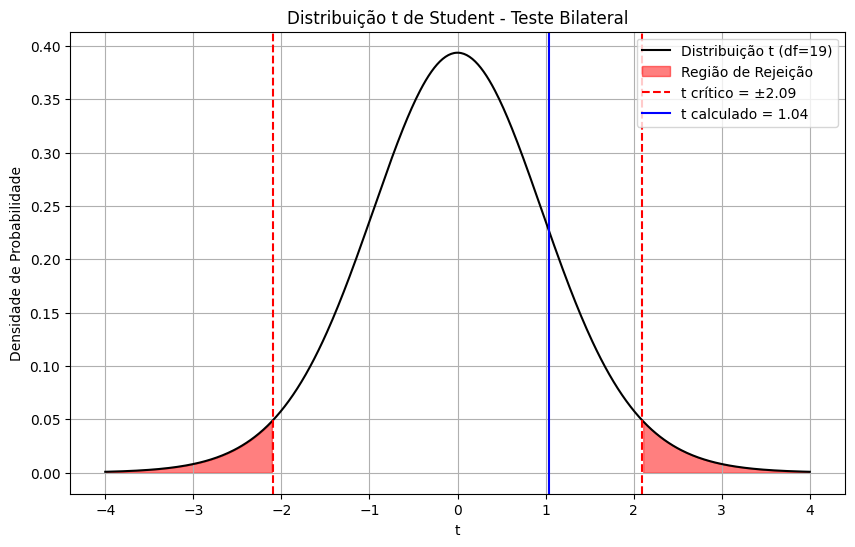

In [31]:
def plot_t_student_bilateral(t_calculado, df, alpha=0.05):
    """
    Plota a distribuição t de Student para um teste bilateral,
    destacando as regiões de rejeição e o valor t calculado.

    Parâmetros:
    - t_calculado: valor t da amostra
    - df: graus de liberdade (n - 1)
    - alpha: nível de significância (default = 0.05)
    """

    # Gerar valores t no intervalo
    t_vals = np.linspace(-4, 4, 500)
    
    # Obter densidade de probabilidade
    #pdf - função densidade de probabilidade
    pdf = t_dist.pdf(t_vals, df)

    # Valores críticos para o teste bilateral
    # ppf - Percent-Point Function (inversa da CDF)
    t_critico = t_dist.ppf(1 - alpha/2, df)

    # Plotar a curva da distribuição t
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, pdf, label=f"Distribuição t (df={df})", color="black")

    # Preencher regiões de rejeição (caudas)
    plt.fill_between(t_vals, 0, pdf, where=(t_vals <= -t_critico), color='red', alpha=0.5, label="Região de Rejeição")
    plt.fill_between(t_vals, 0, pdf, where=(t_vals >= t_critico), color='red', alpha=0.5)

    # Marcar valor t crítico (positivo e negativo)
    plt.axvline(x=-t_critico, color='red', linestyle='--', label=f"t crítico = ±{t_critico:.2f}")
    plt.axvline(x=t_critico, color='red', linestyle='--')

    # Marcar valor t calculado
    plt.axvline(x=t_calculado, color='blue', linestyle='-', label=f"t calculado = {t_calculado:.2f}")

    # Configurações do gráfico
    plt.title('Distribuição t de Student - Teste Bilateral')
    plt.xlabel('t')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    plt.show()

df = len(grupo1) - 1
plot_t_student_bilateral(t_calculado, df)

### Tstudent Independente - Manual

Comparar as médias de dois grupos independentes.

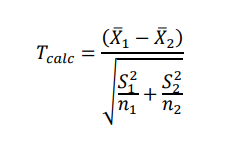

In [32]:
import math
def t_student_duas_amostras(amostra1, amostra2, alpha=0.05):
    """
    Calcula o valor t para comparação de duas amostras independentes 
    assumindo variâncias iguais (teste t para duas amostras).

    Parâmetros:
    - amostra1: dados da primeira amostra
    - amostra2: dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido
    - df: graus de liberdade
    """

    # Tamanho das amostras
    n1, n2 = len(amostra1), len(amostra2)

    # Médias das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variâncias amostrais
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada (assumindo variâncias iguais)
    #sqrt - raiz quadrada
    sp = math.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Valor t calculado
    t_calculado = (media1 - media2) / (sp * math.sqrt(1/n1 + 1/n2))

    # Graus de liberdade
    df = n1 + n2 - 2

    return t_calculado, df, media1, media2

In [33]:
t_calculado, df, media1, media2 = t_student_duas_amostras(grupo1, grupo2)

print(f"Valor t calculado: {t_calculado:.4f}")
print(f"Graus de liberdade: {df}")
print(f"Média amostra 1: {media1:.4f}")
print(f"Média amostra 2: {media2:.4f}") 

Valor t calculado: 1.5930
Graus de liberdade: 38
Média amostra 1: 0.2167
Média amostra 2: -0.2609


### Tstudent Independente - Biblioteca

In [34]:
stat, p = ttest_ind(grupo1, grupo2, equal_var=True)
print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")

#equal_var=True - assume variâncias iguais
#ttest_ind - teste t para duas amostras independentes

t-Student: estatística = 1.5930, p-valor = 0.1194


In [35]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:  
    print("As médias são significativamente iguais (não rejeita H0)")

As médias são significativamente iguais (não rejeita H0)


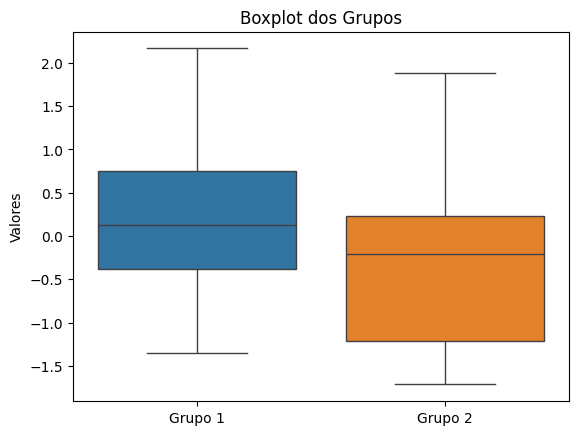

In [36]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Tstudent Emparelhado - Manual

In [37]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 10), np.random.uniform(10, 20, 10)])  
])

# Simulando uma mudança no grupo (grupo2) para amostras pareadas
grupo2 = grupo1 + np.random.normal(0, 0.5, 20)

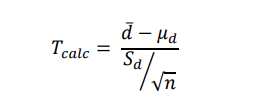

In [38]:
def t_student_amostras_emparelhadas(grupo1, grupo2, alpha=0.05):
    """
    Realiza o teste t de Student para amostras emparelhadas, comparando as médias das diferenças.

    Parâmetros:
    - grupo1: dados da primeira amostra
    - grupo2: dados da segunda amostra
    - alpha: nível de significância (default = 0.05)

    Retorna:
    - t_calculado: valor t obtido
    - p_valor: valor p para o teste
    - rejeitar_H0: booleano indicando se H0 é rejeitada
    """
    
    # Calcular as diferenças (d = grupo1 - grupo2)
    diferencas = np.array(grupo1) - np.array(grupo2)

    # Calcular a média das diferenças (d_bar)
    media_diferencas = np.mean(diferencas)

    # Calcular o desvio padrão das diferenças (s_d) - amostral
    desvio_diferencas = np.std(diferencas, ddof=1)

    # Número de pares
    n = len(diferencas)

    # Calcular o valor t
    t_calculado = media_diferencas / (desvio_diferencas / np.sqrt(n))

    # Calcular os graus de liberdade (df)
    df = n - 1

    # Calcular o p-valor
    p_valor = 2 * (1 - t_dist.cdf(abs(t_calculado), df))

    # Determinar se devemos rejeitar H0
    rejeitar_H0 = p_valor < alpha

    return t_calculado, p_valor, rejeitar_H0, df


In [39]:
t_calculado, p_valor, rejeitar_H0, df = t_student_amostras_emparelhadas(grupo1, grupo2)
print(f"Valor t calculado: {t_calculado:.4f}")
print(f"p-valor: {p_valor:.4f}")
print(f"Graus de liberdade: {df}")
print(f"Rejeitar H0? {'Sim' if rejeitar_H0 else 'Não'}")

Valor t calculado: 0.2807
p-valor: 0.7820
Graus de liberdade: 19
Rejeitar H0? Não


### Tsudent Emparelhado - Biblioteca

In [40]:
t_stat, p_value = stats.ttest_rel(grupo1, grupo2)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

#stats - biblioteca de estatísticas do scipy
#ttest_rel - teste t para amostras emparelhadas

Estatística t: 0.2807
P-valor: 0.7820


In [41]:
if p_value < 0.05:
    print("Rejeitamos H0: As médias dos dois grupos pareados são diferentes.")
else:
    print("Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.")

Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.


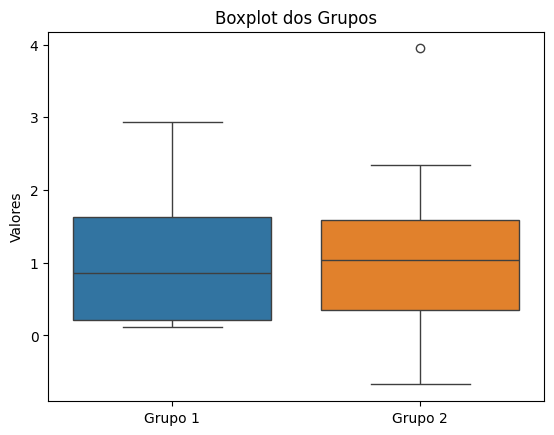

In [42]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Testes de Homogeneidade de variâncias

O teste de homogeneidade verifica se duas ou mais populações têm variâncias (ou distribuições) iguais.

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

### Teste Bartlett - Manual

Teste Bartlett Manual

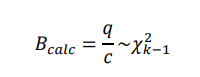

In [43]:
def bartlett_duas_amostras(amostra1, amostra2):
    """
    Realiza o teste de Bartlett para comparar as variâncias de duas amostras,
    verificando se elas vêm de populações com variâncias homogêneas.

    Parâmetros:
    - amostra1: lista ou array com os dados da primeira amostra
    - amostra2: lista ou array com os dados da segunda amostra

    Retorna:
    - estatistica: valor da estatística do teste de Bartlett
    - p_valor: valor p para o teste
    """
    
    # Número de observações em cada amostra
    n1, n2 = len(amostra1), len(amostra2)

    # Média das amostras
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    # Variância das amostras (usando fórmula amostral)
    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # Variância combinada
    sp = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)

    # Estatística A (baseada nas variâncias)
    #math.log - logaritmo natural
    A = (n1 + n2 - 2) * math.log(sp) - (n1 - 1) * math.log(var1) - (n2 - 1) * math.log(var2) #q

    # Estatística B, que leva em consideração o número de observações
    B = 1 + (1 / (3 * (2 - 1))) * (1 / (n1 - 1) + 1 / (n2 - 1) - 1 / (n1 + n2 - 2)) #c

    # Estatística do teste de Bartlett
    estatistica = A / B

    # Calcular o p-valor usando a distribuição qui-quadrado (chi2) com 1 grau de liberdade
    #stats.chi2 - distribuição qui-quadrado
    p_valor = 1 - stats.chi2.cdf(estatistica, df=1)

    return estatistica, p_valor

O CDF calcula a probabilidade acumulada de um valor observado ser menor ou igual a um valor específico em uma distribuição qui-quadrado.

Subtrair o CDF de 1 nos dá a probabilidade de que o valor observado seja maior que o valor calculado, que é o p-valor usado para tomar a decisão no teste de hipóteses.

In [44]:
estatistica, p_valor = bartlett_duas_amostras(grupo1, grupo2)

# Exibir os resultados
print(f"Estatística do teste de Bartlett: {estatistica:.4f}")
print(f"P-valor: {p_valor:.4f}")

Estatística do teste de Bartlett: 0.5092
P-valor: 0.4755


### Teste Barlett - Biblioteca

In [45]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")
#bartlett - teste de Bartlett para homogeneidade de variâncias

Bartlett: estatística = 0.5092, p-valor = 0.4755


In [46]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 0.8620825826406989
Variancia grupo2: 1.202062761877831


In [47]:
if p <= 0.05:
    print("Uma ou mais variâncias são diferentes (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais (não rejeita H0)")

Todas as variâncias são significamente iguais (não rejeita H0)


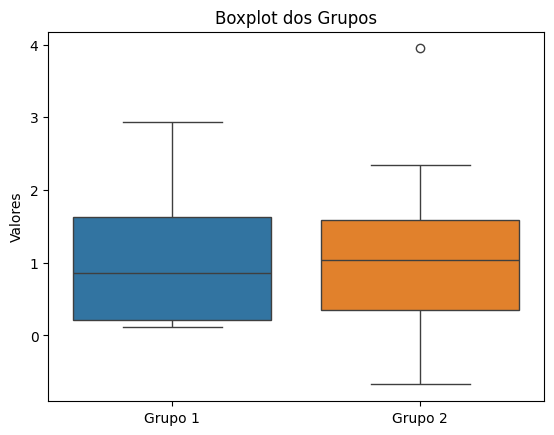

In [48]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()